# buffered `World Countries` polygons unioned & dissolved for anchorages labelling

2019-08-06

Brian Wong

_*updated 2020-03-27_

Notebook used to produce a global land polygon with a 450m buffer. The output data was used for labelling anchorage's (at `world-fishing-827.anchorages.named_anchorages_v20190827`) boolean `dock` status in `world-countries-450m-anchorage-labeler-20191005.ipynb`. Following steps higlight include steps before this notebook.

- Accessed orignial land polygons dataset here: https://www.arcgis.com/home/item.html?id=d974d9c6bc924ae0a2ffea0a46d71e3d
- Applied 450m buffer applied in ArcGIS (QGIS and notebook tools were failing)
- Results in 657 overlapping polygons
- Here, we overlay the 657 polygons and dissolve all boundaries
- Output file `world_countries_450m_buffer_cascaded_union.shp` used in next notebook to label anchorages as dock or anchored
- Helpful links:
    - https://stackoverflow.com/questions/40385782/make-a-union-of-polygons-in-geopandas-or-shapely-into-a-single-geometry
    - https://shapely.readthedocs.io/en/stable/manual.html#cascading-unions

In [1]:
import geopandas as gpd

In [8]:
shp = gpd.read_file('world_countries_450m_buffer/world_countries_450m_buffer.shp')

In [9]:
print(shp)

    FIPS_CNTRY ISO_2DIGIT ISO_3DIGIT                    NAME  \
0         None       None       None                    None   
1         None       None       None                    None   
2         None       None       None                    None   
3           AN         AD        AND                 Andorra   
4           AE         AE        ARE    United Arab Emirates   
5           AE         AE        ARE    United Arab Emirates   
6           AE         AE        ARE    United Arab Emirates   
7           AF         AF        AFG             Afghanistan   
8           AC         AG        ATG     Antigua and Barbuda   
9           AC         AG        ATG     Antigua and Barbuda   
10          AC         AG        ATG     Antigua and Barbuda   
11          AV         AI        AIA                Anguilla   
12          AV         AI        AIA                Anguilla   
13          AL         AL        ALB                 Albania   
14          AL         AL        ALB    

In [13]:
shp.geometry

0      POLYGON ((111.918158633222 8.637746848294228, ...
1      (POLYGON ((123.5497313380786 25.73057605978795...
2      (POLYGON ((123.4932165710361 25.73667431945421...
3      POLYGON ((1.557836763946739 42.65708560668304,...
4      (POLYGON ((53.01388037430223 24.16333033734941...
5      POLYGON ((56.16658289210568 26.05937697242069,...
6      (POLYGON ((53.57435525436154 24.05218535433852...
7      POLYGON ((71.00586949386053 38.47975874686722,...
8      (POLYGON ((-61.6802751409669 17.03481585405473...
9      POLYGON ((-61.83035206236053 17.17658596401094...
10     (POLYGON ((-62.34465050297621 16.9272857157943...
11     (POLYGON ((-63.2432787854292 18.28588609686545...
12     (POLYGON ((-63.17539488221001 18.1502462379477...
13     (POLYGON ((19.99170960097337 39.76829176884092...
14     (POLYGON ((19.28397288534381 40.50627450063143...
15     POLYGON ((19.76088932334778 42.63194748635317,...
16     (POLYGON ((45.53666501130908 40.67204536278774...
17     (POLYGON ((11.7051896798

In [14]:
# dumping all geometries to single list for cascaded_union

polygons = list(shp.geometry)

In [16]:
len(polygons)

657

In [17]:
from shapely.ops import cascaded_union

In [18]:
output = gpd.GeoSeries(cascaded_union(polys))

In [19]:
output.to_file('world_countries_450m_buffer_cascaded_union.shp')

## check results

In [ ]:
polygon = gpd.read_file('world_countries_450m_buffer_cascaded_union/world_countries_450m_buffer_cascaded_union.shp')

In [ ]:
# make sure it's 1 giant polygon vs the 657 from before
polygon

In [4]:
len(polygon)

1

In [ ]:
from matplotlib import pyplot as plt

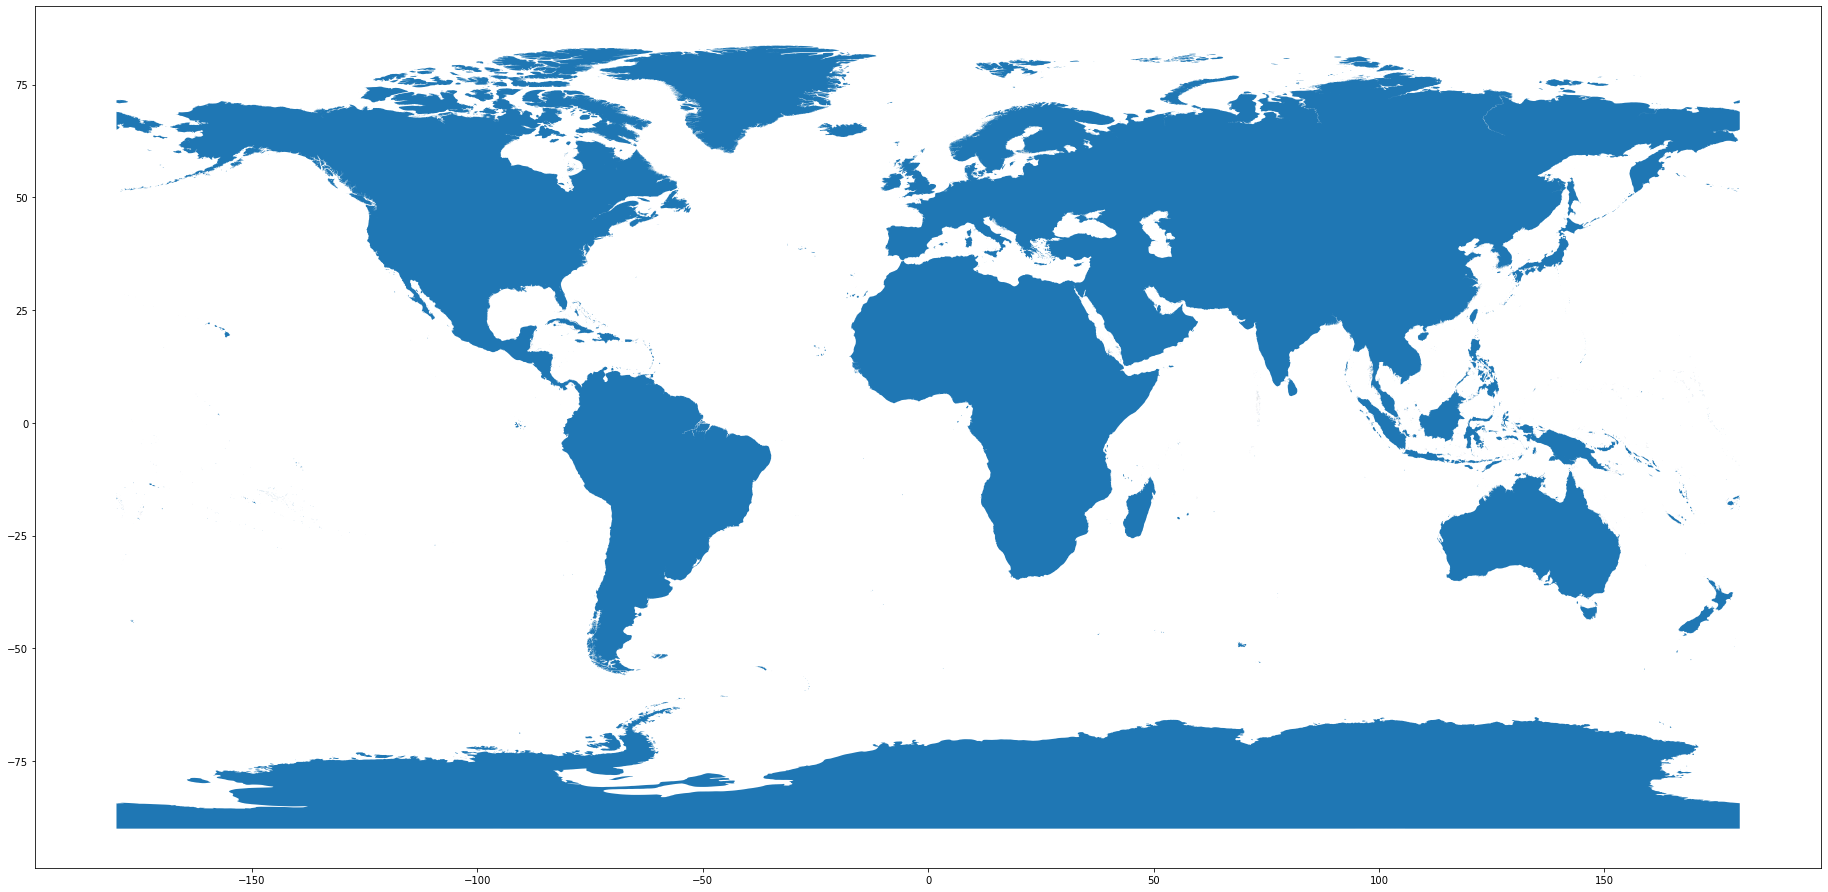

In [6]:
f, ax = plt.subplots(1, figsize=(32, 32))
ax = polygon.plot(axes=ax)
plt.show()

/anaconda3/envs/gis/lib/python3.7/site-packages/geopandas/plotting.py:400: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


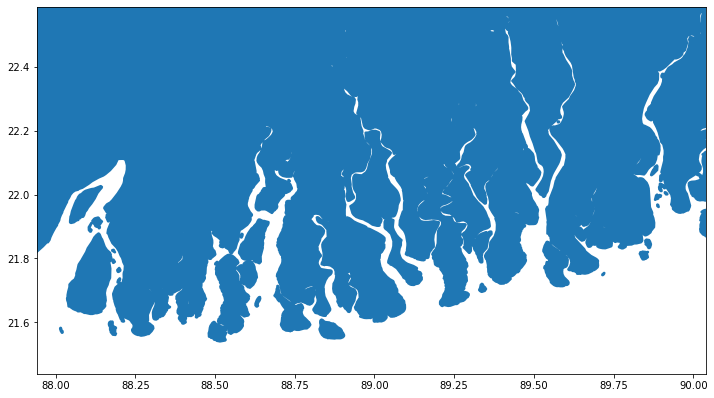

In [5]:
#india bangladesh border
f, ax = plt.subplots(1, figsize=(12, 12))
minx, miny, maxx, maxy = 87.9403,21.4378,90.0404,22.5891
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax = polygon.plot(axes=ax)
plt.show()

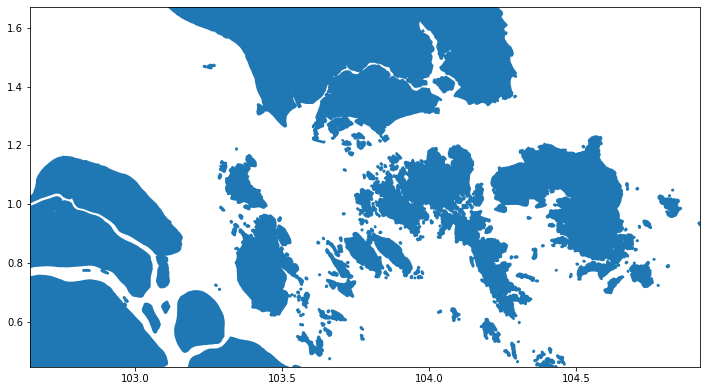

In [36]:
# singapore
f, ax = plt.subplots(1, figsize=(12, 12))
minx, miny, maxx, maxy = 102.6434,0.4462,104.9221,1.6701
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax = polygon.plot(axes=ax)
plt.show()

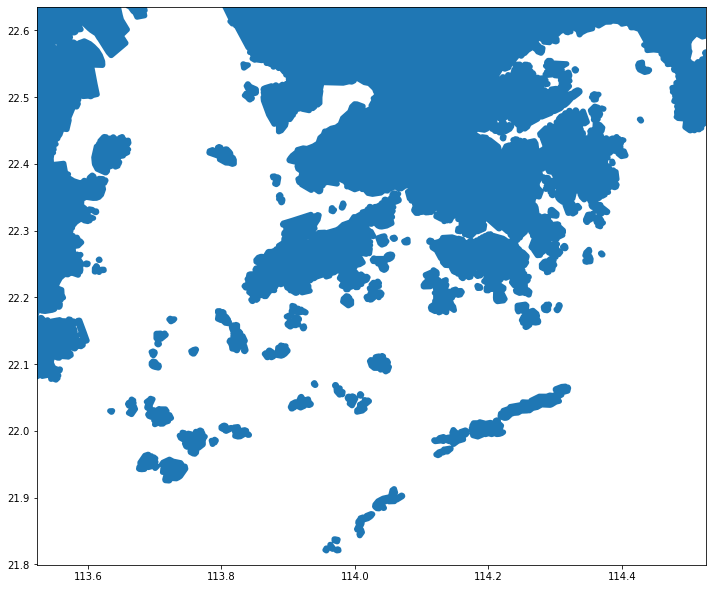

In [34]:
# hong kong
f, ax = plt.subplots(1, figsize=(12, 12))
minx, miny, maxx, maxy = 113.5231,21.7994,114.5264,22.6356
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax = polygon.plot(axes=ax)
plt.show()

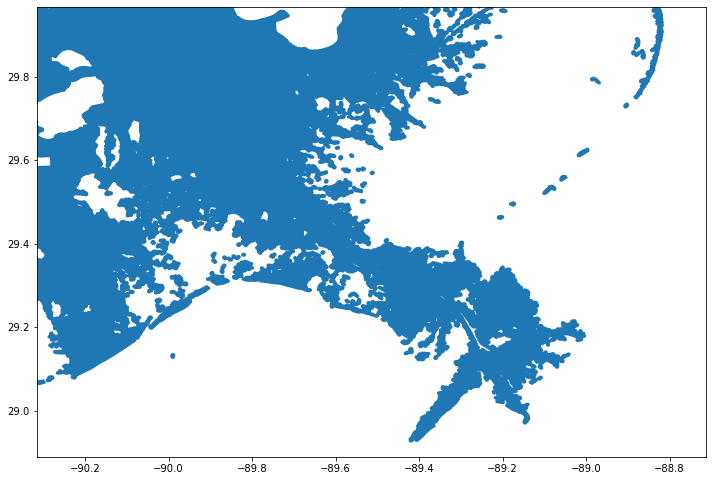

In [38]:
# new orleans
f, ax = plt.subplots(1, figsize=(12, 12))
minx, miny, maxx, maxy = -90.3162,28.8901,-88.7123,29.9672
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax = polygon.plot(axes=ax)
plt.show()